In [2]:
import snap
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm

In [4]:
Graph = nx.read_gml('netscience.gml', label = 'id')

In [5]:
Graph.nodes()
node_list = list(Graph)

In [6]:
def ego_graph_edges(Graph, node):
    Ego_graph = nx.ego_graph(Graph, node, undirected = True)
    return Ego_graph.number_of_edges()

In [7]:
def ego_graph_degree(Graph, node):
    Ego_graph = nx.ego_graph(Graph, node, undirected = True)
    ego_nodes = list(Ego_graph)
    out_degrees = 0
    ego_degrees = 0
    for node in ego_nodes:
        out_degrees += Graph.degree[node]
        ego_degrees += Ego_graph.degree[node]
    return (out_degrees - ego_degrees)

In [8]:
def similarity(x, y, node):
    if norm(x) == 0 or norm(y) == 0:
        return (0, node)
    sim = np.inner(x, y)/(norm(x) * norm(y))
    return (sim, node)

In [9]:
feature_matrix = np.zeros([1589,3], dtype = int)
for node in node_list:
    feature_matrix[node][0] = Graph.degree(node)
    feature_matrix[node][1] = ego_graph_edges(Graph, node)
    feature_matrix[node][2] = ego_graph_degree(Graph, node)
print(feature_matrix)

[[ 2  3  1]
 [ 3  4  0]
 [ 4 10  0]
 ...
 [ 1  1  1]
 [ 1  1  1]
 [ 2  3 10]]


In [10]:
feature_matrix[9]

array([ 6, 10,  1])

In [8]:
sim_list = []
for node in node_list:
    if node != 9:
        sim_list.append(similarity(feature_matrix[9], feature_matrix[node], node))
sim_list = sorted(sim_list, reverse = True)
print(sim_list[0:5])
#415, 288, 286, 1336, 1054

[(0.9996157540684272, 415), (0.996343680627828, 288), (0.996343680627828, 286), (0.9961182380000687, 1336), (0.9961182380000687, 1054)]


In [9]:
feature_matrix_sum = np.zeros([1589,3], dtype = int)
for node in node_list:
    for ngb in Graph.neighbors(node):
        feature_matrix_sum[node] += feature_matrix[ngb]
print(feature_matrix_sum)

[[ 5  7  1]
 [ 5  7  4]
 [16 40  0]
 ...
 [ 2  2  0]
 [ 2  2  0]
 [14 27 12]]


In [10]:
feature_matrix_mean = np.zeros([1589,3], dtype = float)
for node in node_list:
    for ngb in Graph.neighbors(node):
        feature_matrix_mean[node] += feature_matrix[ngb]
    if Graph.degree(node) == 0:
        feature_matrix_mean[node] = 0
    else:
        feature_matrix_mean[node] = feature_matrix_mean[node]/Graph.degree(node)
print(feature_matrix_mean)

[[ 2.5         3.5         0.5       ]
 [ 1.66666667  2.33333333  1.33333333]
 [ 4.         10.          0.        ]
 ...
 [ 2.          2.          0.        ]
 [ 2.          2.          0.        ]
 [ 7.         13.5         6.        ]]


In [11]:
iter1 = np.hstack((feature_matrix, feature_matrix_mean, feature_matrix_sum))

In [12]:
iter1

array([[ 2.,  3.,  1., ...,  5.,  7.,  1.],
       [ 3.,  4.,  0., ...,  5.,  7.,  4.],
       [ 4., 10.,  0., ..., 16., 40.,  0.],
       ...,
       [ 1.,  1.,  1., ...,  2.,  2.,  0.],
       [ 1.,  1.,  1., ...,  2.,  2.,  0.],
       [ 2.,  3., 10., ..., 14., 27., 12.]])

In [13]:
feature_matrix_sum2 = np.zeros([1589,9], dtype = float)
for node in node_list:
    for ngb in Graph.neighbors(node):
        feature_matrix_sum2[node] += iter1[ngb]
print(feature_matrix_sum2)

[[  5.   7.   1. ...  10.  14.   5.]
 [  5.   7.   4. ...  13.  18.   2.]
 [ 16.  40.   0. ...  64. 160.   0.]
 ...
 [  2.   2.   0. ...   2.   2.   2.]
 [  2.   2.   0. ...   2.   2.   2.]
 [ 14.  27.  12. ...  52. 105. 111.]]


In [14]:
feature_matrix_mean2 = np.zeros([1589,9], dtype = float)
for node in node_list:
    for ngb in Graph.neighbors(node):
        feature_matrix_mean2[node] += iter1[ngb]
    if Graph.degree(node) == 0:
        feature_matrix_mean2[node] = 0
    else:
        feature_matrix_mean2[node] = feature_matrix_mean2[node]/Graph.degree(node)
print(feature_matrix_mean2)

[[ 2.5         3.5         0.5        ...  5.          7.
   2.5       ]
 [ 1.66666667  2.33333333  1.33333333 ...  4.33333333  6.
   0.66666667]
 [ 4.         10.          0.         ... 16.         40.
   0.        ]
 ...
 [ 2.          2.          0.         ...  2.          2.
   2.        ]
 [ 2.          2.          0.         ...  2.          2.
   2.        ]
 [ 7.         13.5         6.         ... 26.         52.5
  55.5       ]]


In [15]:
iter2 = np.hstack((iter1, feature_matrix_mean2, feature_matrix_sum2))

In [16]:
iter2

array([[  2.,   3.,   1., ...,  10.,  14.,   5.],
       [  3.,   4.,   0., ...,  13.,  18.,   2.],
       [  4.,  10.,   0., ...,  64., 160.,   0.],
       ...,
       [  1.,   1.,   1., ...,   2.,   2.,   2.],
       [  1.,   1.,   1., ...,   2.,   2.,   2.],
       [  2.,   3.,  10., ...,  52., 105., 111.]])

In [17]:
iter2.shape

(1589, 27)

In [18]:
sim_list2 = []
for node in node_list:
    if node != 9:
        sim_list2.append(similarity(iter2[9], iter2[node], node))
sim_list2 = sorted(sim_list2, reverse = True)
print(sim_list2[300:450])
# 973, 537, 415, 496, 25

[(0.9118905251129772, 845), (0.9118905251129772, 844), (0.9118905251129772, 824), (0.9118905251129772, 823), (0.9118905251129772, 822), (0.9118905251129772, 821), (0.9118905251129772, 769), (0.9118905251129772, 768), (0.9118905251129772, 767), (0.9118905251129772, 766), (0.9118905251129772, 726), (0.9118905251129772, 725), (0.9118905251129772, 724), (0.9118905251129772, 723), (0.9118905251129772, 707), (0.9118905251129772, 706), (0.9118905251129772, 705), (0.9118905251129772, 704), (0.9118905251129772, 684), (0.9118905251129772, 683), (0.9118905251129772, 682), (0.9118905251129772, 681), (0.9118905251129772, 661), (0.9118905251129772, 660), (0.9118905251129772, 659), (0.9118905251129772, 658), (0.9118905251129772, 628), (0.9118905251129772, 627), (0.9118905251129772, 626), (0.9118905251129772, 625), (0.9118905251129772, 449), (0.9118905251129772, 448), (0.9118905251129772, 447), (0.9118905251129772, 446), (0.9118905251129772, 400), (0.9118905251129772, 399), (0.9118905251129772, 398), 

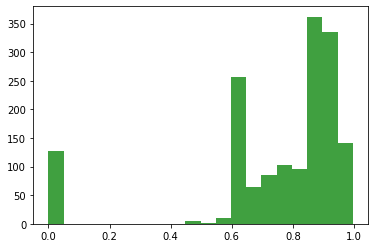

In [19]:
sim_list_plot = sorted([x[0] for x in sim_list2])
num_bins = 20
n, bins, patches = plt.hist(sim_list_plot, num_bins, facecolor='green', alpha=0.75)
# 3 groups: 0, 0.6, 0.9

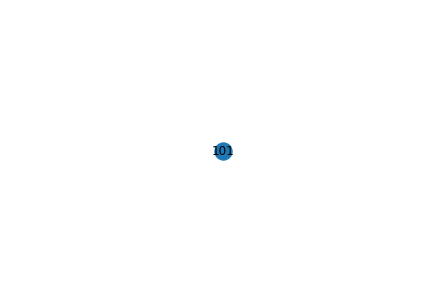

In [20]:
ego1 = nx.ego_graph(Graph, 101, radius = 3, undirected = True)
nx.draw(ego1, with_labels = True)

C:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


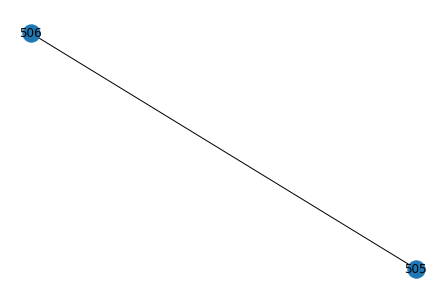

In [21]:
ego2 = nx.ego_graph(Graph, 505, radius = 3, undirected = True)
nx.draw(ego2, with_labels = True)

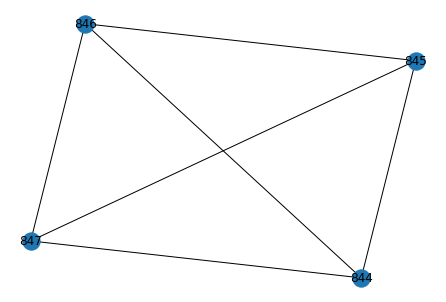

In [22]:
ego3 = nx.ego_graph(Graph, 845, radius = 3, undirected = True)
nx.draw(ego3, with_labels = True)